# Importing data

In [2]:
import pandas as pd
true = pd.read_csv('../raw_data/True.csv')
fake = pd.read_csv('../raw_data/Fake.csv')

# Dropping some columns 

In [3]:
true.drop(columns = ['date', 'subject'], inplace = True)
fake.drop(columns = ['date', 'subject'], inplace = True)

# Creating new datasets so we dont mess with the real ones

In [4]:
true_copy = true.copy()
fake_copy = fake.copy()

# Brief Data Cleaning

In [5]:
stop_words = ['/Getty Images']
pat = '|'.join(r"\b{}\b".format(x) for x in stop_words)
fake_copy['text'] = fake_copy['text'].str.replace(pat, '')
true_copy['text'] = true_copy['text'].str.replace(pat, '')

# Adding features ratio

## Length Feature

In [6]:
true_copy['title_length_char'] = true_copy.title.str.len()
true_copy['text_length_char'] = true_copy.text.str.len()
true_copy['title_length_words'] =  true_copy.title.str.split().str.len()
true_copy['text_length_words'] =  true_copy.text.str.split().str.len()

In [7]:
fake_copy['title_length_char'] = fake_copy.title.str.len()
fake_copy['text_length_char'] = fake_copy.text.str.len()
fake_copy['title_length_words'] =  fake_copy.title.str.split().str.len()
fake_copy['text_length_words'] =  fake_copy.text.str.split().str.len()

## Punctuation ratio

In [8]:
import string

count = lambda l1,l2: sum([1 for x in l1 if x in l2])

true_copy['title_punc'] = true_copy.title.apply(lambda s: count(s, string.punctuation))

true_copy['text_punc'] = true_copy.text.apply(lambda s: count(s, string.punctuation))

fake_copy['title_punc'] = fake_copy.title.apply(lambda s: count(s, string.punctuation))

fake_copy['text_punc'] = fake_copy.text.apply(lambda s: count(s, string.punctuation))

In [9]:
true_copy['title_punc_ratio'] = true_copy.title_punc / true_copy.title_length_char
true_copy.drop(columns = 'title_punc', inplace = True)
true_copy['text_punc_ratio'] = true_copy.text_punc / true_copy.text_length_char
true_copy.drop(columns = 'text_punc', inplace = True)

In [10]:
fake_copy['title_punc_ratio'] = fake_copy.title_punc / fake_copy.title_length_char
fake_copy.drop(columns = 'title_punc', inplace = True)
fake_copy['text_punc_ratio'] = fake_copy.text_punc / fake_copy.text_length_char
fake_copy.drop(columns = 'text_punc', inplace = True)

## UpperCase Ratio

In [11]:
true_copy['title_Upper'] = true_copy['title'].str.count(r'[A-Z]')
true_copy['text_Upper'] = true_copy['text'].str.count(r'[A-Z]')
fake_copy['title_Upper'] = fake_copy['title'].str.count(r'[A-Z]')
fake_copy['text_Upper'] = fake_copy['text'].str.count(r'[A-Z]')

In [12]:
true_copy['title_lower_ratio'] = true_copy.title_Upper / true_copy.title_length_char
true_copy.drop(columns = 'title_Upper', inplace = True)
true_copy['text_lower_ratio'] = true_copy.text_Upper / true_copy.text_length_char
true_copy.drop(columns = 'text_Upper', inplace = True)

In [13]:
fake_copy['title_lower_ratio'] = fake_copy.title_Upper / fake_copy.title_length_char
fake_copy.drop(columns = 'title_Upper', inplace = True)
fake_copy['text_lower_ratio'] = fake_copy.text_Upper / fake_copy.text_length_char
fake_copy.drop(columns = 'text_Upper', inplace = True)

## Numbers Ratio

In [14]:
def count_digits(string):
    return sum(item.isdigit() for item in string)

true_copy['title_num'] = true_copy['title'].apply(count_digits)
true_copy['text_num'] = true_copy['text'].apply(count_digits)
fake_copy['title_num'] = fake_copy['title'].apply(count_digits)
fake_copy['text_num'] = fake_copy['text'].apply(count_digits)

In [15]:
true_copy['title_num_ratio'] = true_copy.title_num / true_copy.title_length_char
true_copy.drop(columns = 'title_num', inplace = True)
true_copy['text_num_ratio'] = true_copy.text_num / true_copy.text_length_char
true_copy.drop(columns = 'text_num', inplace = True)

In [16]:
fake_copy['title_num_ratio'] = fake_copy.title_num / fake_copy.title_length_char
fake_copy.drop(columns = 'title_num', inplace = True)
fake_copy['text_num_ratio'] = fake_copy.text_num / fake_copy.text_length_char
fake_copy.drop(columns = 'text_num', inplace = True)

## Typo Ratio

### Need to create a cleaned text and title to tokenize the words only

In [17]:
import string

punc = string.punctuation + '“' + '”' + '’' + '‘' + '–'

def remove_punctuation(text):
    for punctuation in punc:
        text = text.replace(punctuation, '')
    return text

def lower_case(text):
    text = text.lower()
    return text

def remove_numbers(text):
    text = ''.join(word for word in text if not word.isdigit())
    return text

In [18]:
fake_copy['title_clean'] = fake_copy['title'].apply(remove_punctuation)
fake_copy['text_clean'] = fake_copy['text'].apply(remove_punctuation)

fake_copy['title_clean'] = fake_copy['title_clean'].apply(lower_case)
fake_copy['text_clean'] = fake_copy['text_clean'].apply(lower_case)

fake_copy['title_clean'] = fake_copy['title_clean'].apply(remove_numbers)
fake_copy['text_clean'] = fake_copy['text_clean'].apply(remove_numbers)

In [19]:
true_copy['title_clean'] = true_copy['title'].apply(remove_punctuation)
true_copy['text_clean'] = true_copy['text'].apply(remove_punctuation)

true_copy['title_clean'] = true_copy['title_clean'].apply(lower_case)
true_copy['text_clean'] = true_copy['text_clean'].apply(lower_case)

true_copy['title_clean'] = true_copy['title_clean'].apply(remove_numbers)
true_copy['text_clean'] = true_copy['text_clean'].apply(remove_numbers)

### need to tokenize text and title so we can use the function get_typos

In [20]:
from nltk.tokenize import word_tokenize

def  tokenize(text):
    token= word_tokenize(text)
    return token

In [21]:
fake_copy['title_tokenized'] = fake_copy['title_clean'].apply(tokenize)
fake_copy['text_tokenized'] = fake_copy['text_clean'].apply(tokenize)
true_copy['title_tokenized'] = true_copy['title_clean'].apply(tokenize)
true_copy['text_tokenized'] = true_copy['text_clean'].apply(tokenize)

### now we can apply the function to the tokenized text/title

In [22]:
import enchant
english = enchant.DictWithPWL("en_US", "vocab.txt")
wrong_words={}
correct_words=set()
def get_typos_t(tokens):
     wrong_count=0
     for token in tokens:
            if token in wrong_words:
                wrong_words[token]+=1
                wrong_count+=1
            else:
                if not token in correct_words:
                    if not english.check(token) and not english.check(token.capitalize()):
                        wrong_words[token]=1
                        wrong_count+=1
                    else:
                        correct_words.add(token)
     return wrong_count

In [23]:
true_copy['ammount_typos_title']=true_copy['title_tokenized'].apply(get_typos_t)
true_copy['ammount_typos_text']=true_copy['text_tokenized'].apply(get_typos_t)

In [24]:
fake_copy['ammount_typos_title']=fake_copy['title_tokenized'].apply(get_typos_t)
fake_copy['ammount_typos_text']=fake_copy['text_tokenized'].apply(get_typos_t)

In [25]:
true_copy['title_typo_ratio']= true_copy['ammount_typos_title']/len(true_copy['title_tokenized'])
true_copy['text_typo_ratio']= true_copy['ammount_typos_text']/len(true_copy['text_tokenized'])

In [26]:
fake_copy['title_typo_ratio']= fake_copy['ammount_typos_title']/len(fake_copy['title_tokenized'])
fake_copy['text_typo_ratio']= fake_copy['ammount_typos_text']/len(fake_copy['text_tokenized'])

## Stopwords Ratio

In [27]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def stopwords_ratio(tokens):
    count_stop_words = 0
    amount_tokens = 0   
    for token in tokens:
        amount_tokens += 1
        if token in stop_words:
            count_stop_words += 1
    if amount_tokens == 0:
        return 0
    return count_stop_words / amount_tokens

In [29]:
true_copy['title_stop_words_ratio'] = true_copy['title_tokenized'].apply(stopwords_ratio)
true_copy['text_stop_words_ratio'] = true_copy['text_tokenized'].apply(stopwords_ratio)

fake_copy['title_stop_words_ratio'] = fake_copy['title_tokenized'].apply(stopwords_ratio)
fake_copy['text_stop_words_ratio'] = fake_copy['text_tokenized'].apply(stopwords_ratio)

In [30]:
true_copy

,title,text,title_length_char,text_length_char,title_length_words,text_length_words,title_punc_ratio,text_punc_ratio,title_lower_ratio,text_lower_ratio,...,title_clean,text_clean,title_tokenized,text_tokenized,ammount_typos_title,ammount_typos_text,title_typo_ratio,text_typo_ratio,title_stop_words_ratio,text_stop_words_ratio
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,64,4659,10,749,0.046875,0.025327,0.062500,0.033269,...,as us budget fight looms republicans flip thei...,washington reuters the head of a conservative...,"[as, us, budget, fight, looms, republicans, fl...","[washington, reuters, the, head, of, a, conser...",0,15,0.000000,0.000700,0.200000,0.398630
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,64,4077,9,624,0.046875,0.018886,0.062500,0.029188,...,us military to accept transgender recruits on ...,washington reuters transgender people will be...,"[us, military, to, accept, transgender, recrui...","[washington, reuters, transgender, people, wil...",0,10,0.000000,0.000467,0.222222,0.391517
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,60,2789,10,457,0.100000,0.016852,0.116667,0.041951,...,senior us republican senator let mr mueller do...,washington reuters the special counsel invest...,"[senior, us, republican, senator, let, mr, mue...","[washington, reuters, the, special, counsel, i...",0,8,0.000000,0.000374,0.200000,0.422907
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,59,2461,9,376,0.033898,0.020723,0.135593,0.044697,...,fbi russia probe helped by australian diplomat...,washington reuters trump campaign adviser geo...,"[fbi, russia, probe, helped, by, australian, d...","[washington, reuters, trump, campaign, adviser...",3,17,0.000140,0.000794,0.111111,0.389785
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,69,5204,11,852,0.028986,0.026134,0.057971,0.038432,...,trump wants postal service to charge much more...,seattlewashington reuters president donald tr...,"[trump, wants, postal, service, to, charge, mu...","[seattlewashington, reuters, president, donald...",0,23,0.000000,0.001074,0.272727,0.412334
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",64,3707,9,599,0.031250,0.022930,0.046875,0.055301,...,white house congress prepare for talks on spen...,west palm beach flawashington reuters the whi...,"[white, house, congress, prepare, for, talks, ...","[west, palm, beach, flawashington, reuters, th...",0,16,0.000000,0.000747,0.222222,0.379898
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",63,3220,11,538,0.031746,0.020186,0.079365,0.044410,...,trump says russia probe will be fair but timel...,west palm beach fla reuters president donald ...,"[trump, says, russia, probe, will, be, fair, b...","[west, palm, beach, fla, reuters, president, d...",1,9,0.000047,0.000420,0.272727,0.416045
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,60,856,10,135,0.083333,0.054907,0.100000,0.068925,...,factbox trump on twitter dec approval rating...,the following statements were posted to the ve...,"[factbox, trump, on, twitter, dec, approval, r...","[the, following, statements, were, posted, to,...",1,7,0.000047,0.000327,0.125000,0.411290
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,42,632,8,100,0.071429,0.058544,0.119048,0.145570,...,trump on twitter dec global warming,the following statements were posted to the ve...,"[trump, on, twitter, dec, global, warming]","[the, following, statements, were, posted, to,...",0,6,0.000000,0.000280,0.166667,0.414894
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary

# Plotting

(0.0, 0.2)

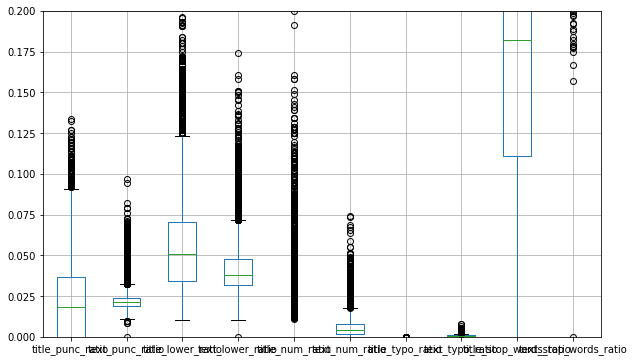

In [28]:
import matplotlib.pyplot as plt


boxplot = true_copy.boxplot(column=['title_punc_ratio',
       'text_punc_ratio', 'title_lower_ratio', 'text_lower_ratio',
       'title_num_ratio', 'text_num_ratio', 'title_typo_ratio','text_typo_ratio','title_stop_words_ratio','text_stop_words_ratio'], figsize=(10,6))
plt.ylim(0,0.2)

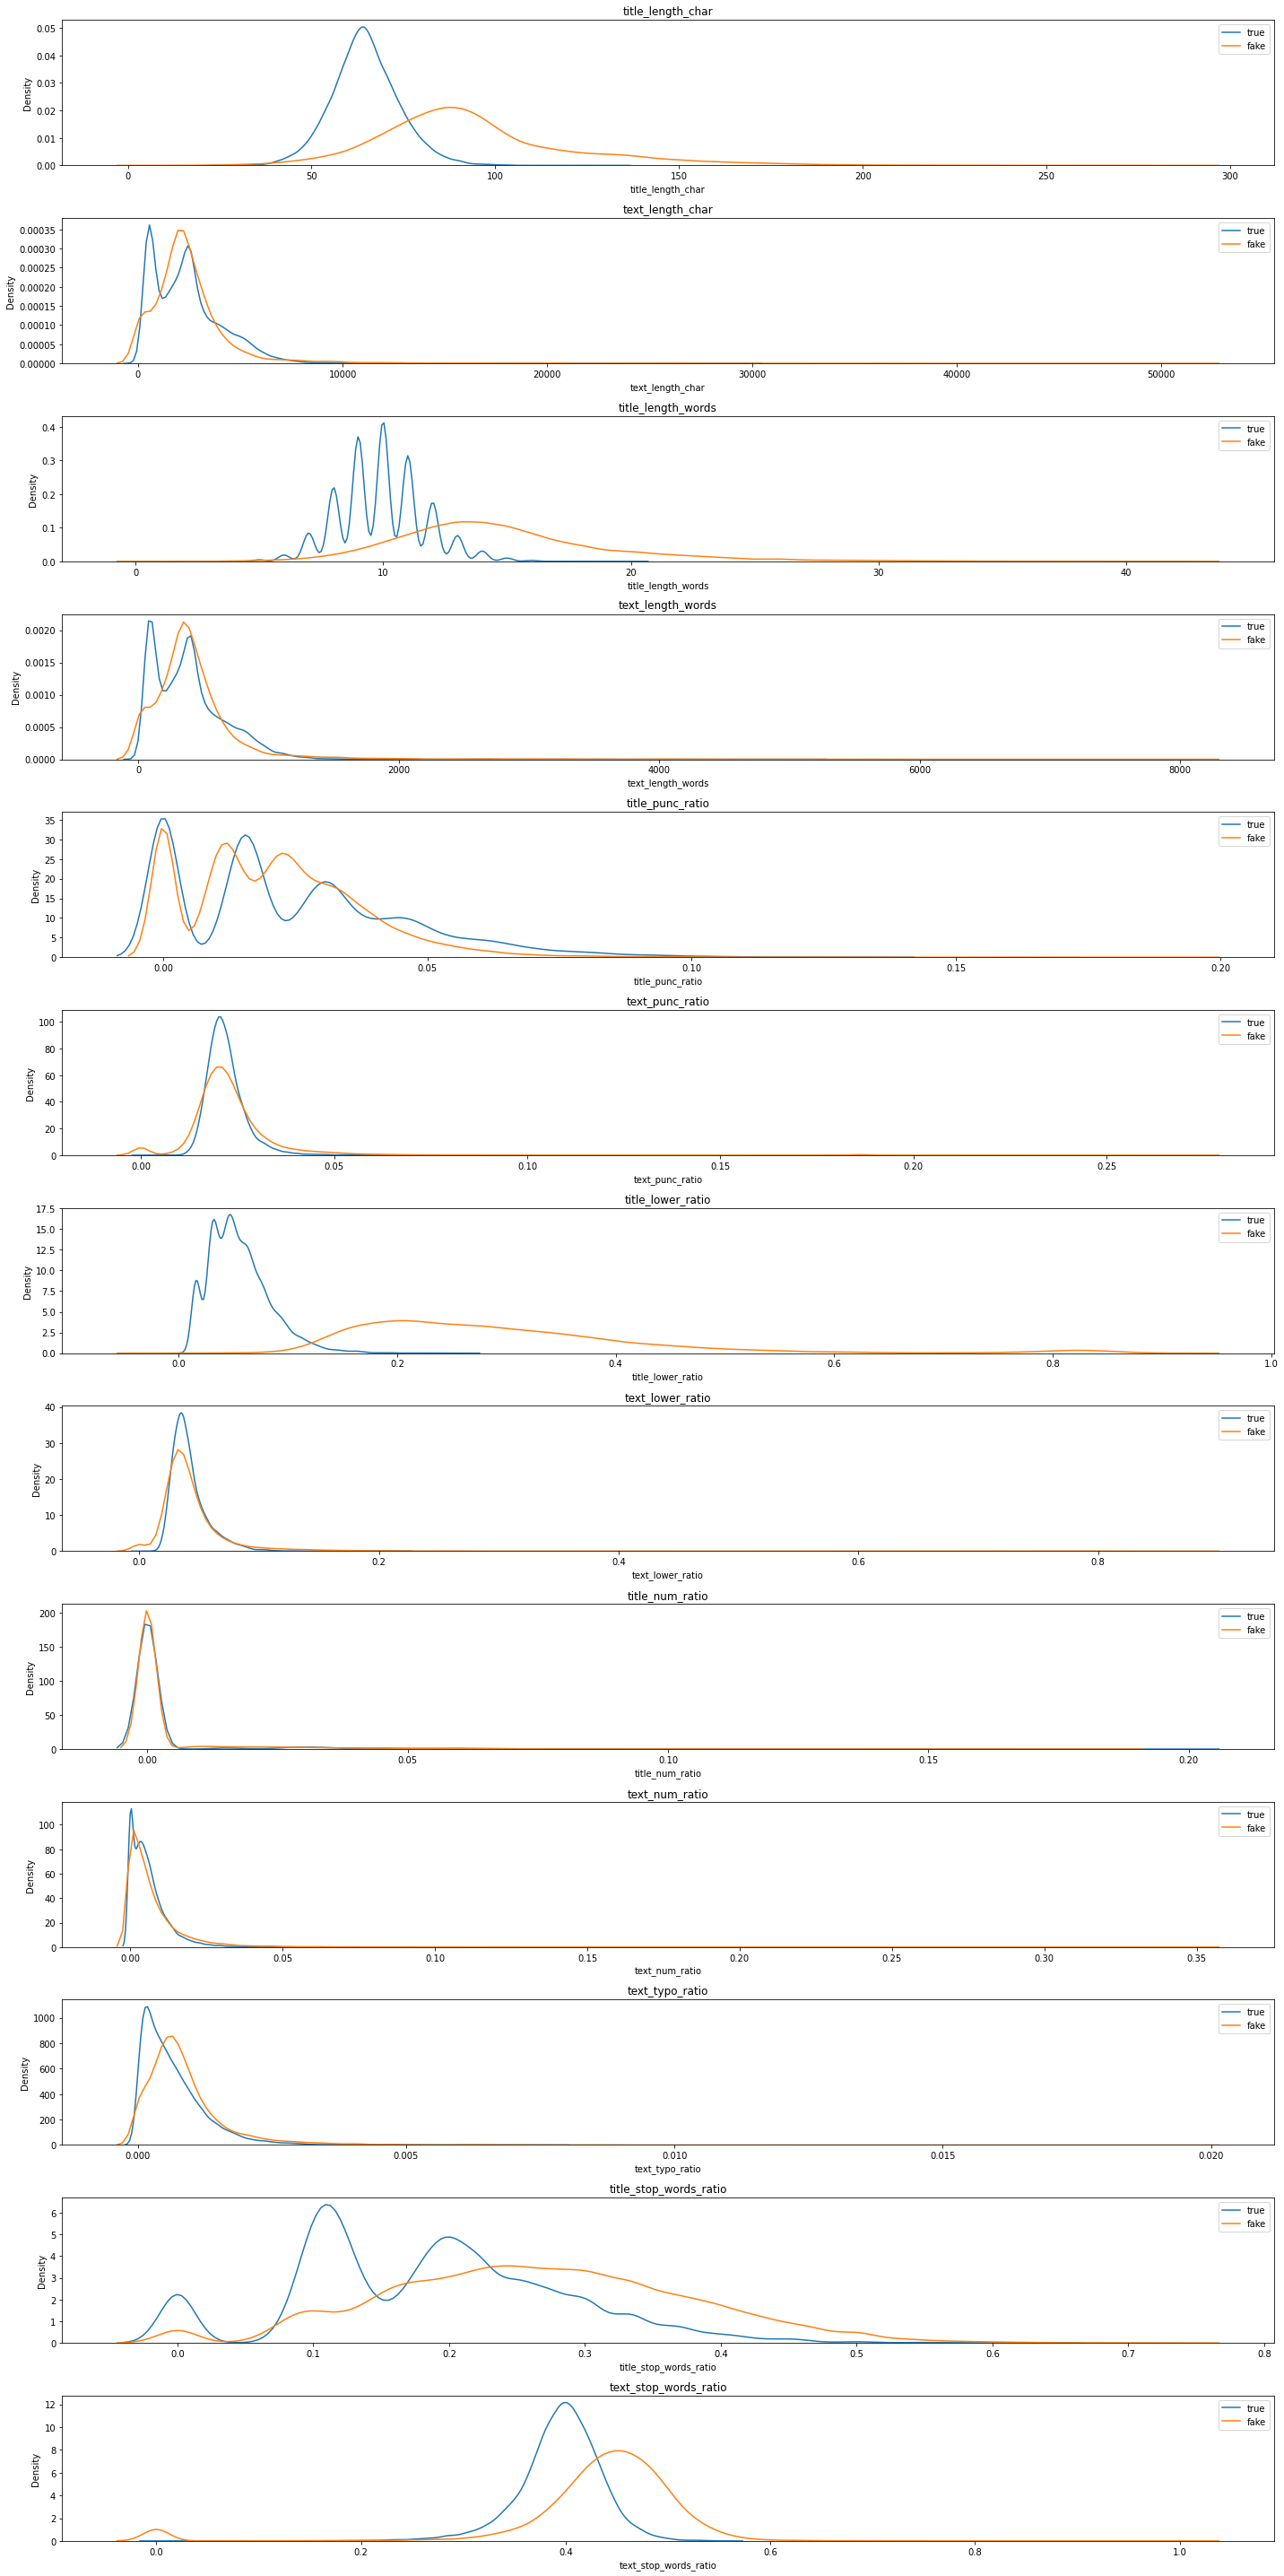

In [29]:
import seaborn as sns
ratio_columns = ['title_length_char', 'text_length_char',
       'title_length_words', 'text_length_words','title_punc_ratio',
       'text_punc_ratio', 'title_lower_ratio', 'text_lower_ratio',
       'title_num_ratio', 'text_num_ratio','text_typo_ratio','title_stop_words_ratio','text_stop_words_ratio']
plt.figure(figsize=(20,40))
for index,column in enumerate(ratio_columns):
    plt.subplot(len(ratio_columns),1,index+1)
    plt.title(column)
    sns.kdeplot(true_copy[column] , label = 'true')
    sns.kdeplot(fake_copy[column], label = 'fake')
    plt.legend()
    plt.tight_layout()

# Starting a model

## First create target and concat datasets

In [30]:
true_copy['score'] = 1
fake_copy['score'] = 0

In [31]:
data = pd.concat([true_copy, fake_copy], ignore_index=True)

In [32]:
data.head()

,title,text,title_length_char,text_length_char,title_length_words,text_length_words,title_punc_ratio,text_punc_ratio,title_lower_ratio,text_lower_ratio,...,text_clean,title_tokenized,text_tokenized,ammount_typos_title,ammount_typos_text,title_typo_ratio,text_typo_ratio,title_stop_words_ratio,text_stop_words_ratio,score
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,64,4659,10,749,0.046875,0.025327,0.062500,0.033269,...,washington reuters the head of a conservative...,"[as, us, budget, fight, looms, republicans, fl...","[washington, reuters, the, head, of, a, conser...",0,15,0.00000,0.000700,0.200000,0.398630,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,64,4077,9,624,0.046875,0.018886,0.062500,0.029188,...,washington reuters transgender people will be...,"[us, military, to, accept, transgender, recrui...","[washington, reuters, transgender, people, wil...",0,10,0.00000,0.000467,0.222222,0.391517,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,60,2789,10,457,0.100000,0.016852,0.116667,0.041951,...,washington reuters the special counsel invest...,"[senior, us, republican, senator, let, mr, mue...","[washington, reuters, the, special, counsel, i...",0,8,0.00000,0.000374,0.200000,0.422907,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,59,2461,9,376,0.033898,0.020723,0.135593,0.044697,...,washington reuters trump campaign adviser geo...,"[fbi, russia, probe, helped, by, australian, d...","[washington, reuters, trump, campaign, adviser...",3,17,0.00014,0.000794,0.111111,0.389785,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,69,5204,11,852,0.028986,0.026134,0.057971,0.038432,...,seattlewashington reuters president donald tr...,"[trump, wants, postal, service, to, charge, mu...","[seattlewashington, reuters, president, donald...",0,23,0.00000,0.001074,0.272727,0.412334,1


## Possible model to run 

In [34]:
x = data.drop(columns=['title', 'text','text_length_char',
       'title_length_words', 'text_length_words', 'title_punc_ratio',
       'text_punc_ratio', 'text_lower_ratio',_
       'title_num_ratio', 'text_num_ratio',
       'title_tokenized', 'text_tokenized', 'ammount_typos_title',
       'ammount_typos_text', 'title_typo_ratio', 'text_typo_ratio',
       'title_stop_words_ratio', 'score'])
y = data['score']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer


preprocessor = ColumnTransformer([
    ('vectorizer_title', CountVectorizer(), 'title'),
    ('vectorizer_text', CountVectorizer(), 'text'),
    ('MinMaxScaler', MinMaxScaler(), ['title_length_char'])
])

final_pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('nb', MultinomialNB())])

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'preprocessing__vectorizer_title__ngram_range': ((2,2),(3,3)),
    'preprocessing__vectorizer_text__ngram_range': ((2,2),(3,3)),
    'preprocessing__vectorizer_text__max_df' : [0.8,1.0],
    'preprocessing__vectorizer_text__min_df' : [0.05, 0.1],
    'nb__alpha': (2,3,5)}

grid_search = GridSearchCV(final_pipe,
                           parameters,
                           scoring = ["f1", "accuracy", "recall"], 
                           refit= "accuracy",
                           cv=3,
                           verbose = 1)

In [ ]:
grid_search.fit(x_train,y_train)

In [ ]:
tuned_pipe = random_search.best_estimator_

In [ ]:
grid_search.best_params_

In [ ]:
pd.DataFrame(grid_search.cv_results_)

In [ ]:
grid_search.score(x_test,y_test)

In [ ]:
import pickle

# Export pipeline as pickle file
with open("pipeline.pkl", "wb") as file:
    pickle.dump(tuned_pipe, file )

# Conclusion :

In [38]:
# Title lenght character
# Title lower Ratio
# Text Typo Ratio
# Text stop_words Ratio

**so 4 features besides text and title might be important to have in our model**